In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pymongo import MongoClient

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["trust_analysis_db"]
collection = db["merged_trust_population"]

In [2]:
# fetching data from db and converting to df
cursor = collection.find()
data = pd.DataFrame(list(cursor))
data.drop(columns=['_id'], inplace=True)
print(data.head())

     country  doctor_and_nurses  government  journalist  neighbourhood  \
0      China              90.86       56.93       74.62          88.08   
1      India              85.67       74.18       69.12          68.36   
2  Indonesia              81.09       70.82       63.41          80.38   
3    Nigeria              64.21       21.11       37.00          42.47   
4     Brazil              84.87       42.98       56.36          53.58   

   philantropist    population  scientist  traditional_healers Capital City_x  \
0          73.24  1.426106e+09      96.57                92.47        Beijing   
1          65.68  1.402618e+09      85.30                38.20          Delhi   
2          58.64  2.748149e+08      70.11                66.59        Jakarta   
3          44.08  2.139962e+08      47.41                35.11          Abuja   
4          65.22  2.086608e+08      79.73                26.95       Brasília   

   Latitude_x  Longitude_x  Population_x Capital City_y  Latitude_y 

In [3]:
#making sure columns are float and rounded to 2 decimals
trust_columns = [
    'neighbourhood', 
    'government', 
    'scientist', 
    'journalist', 
    'doctor_and_nurses', 
    'philantropist', 
    'traditional_healers'
]
top_50_countries = data.nlargest(50, "population")

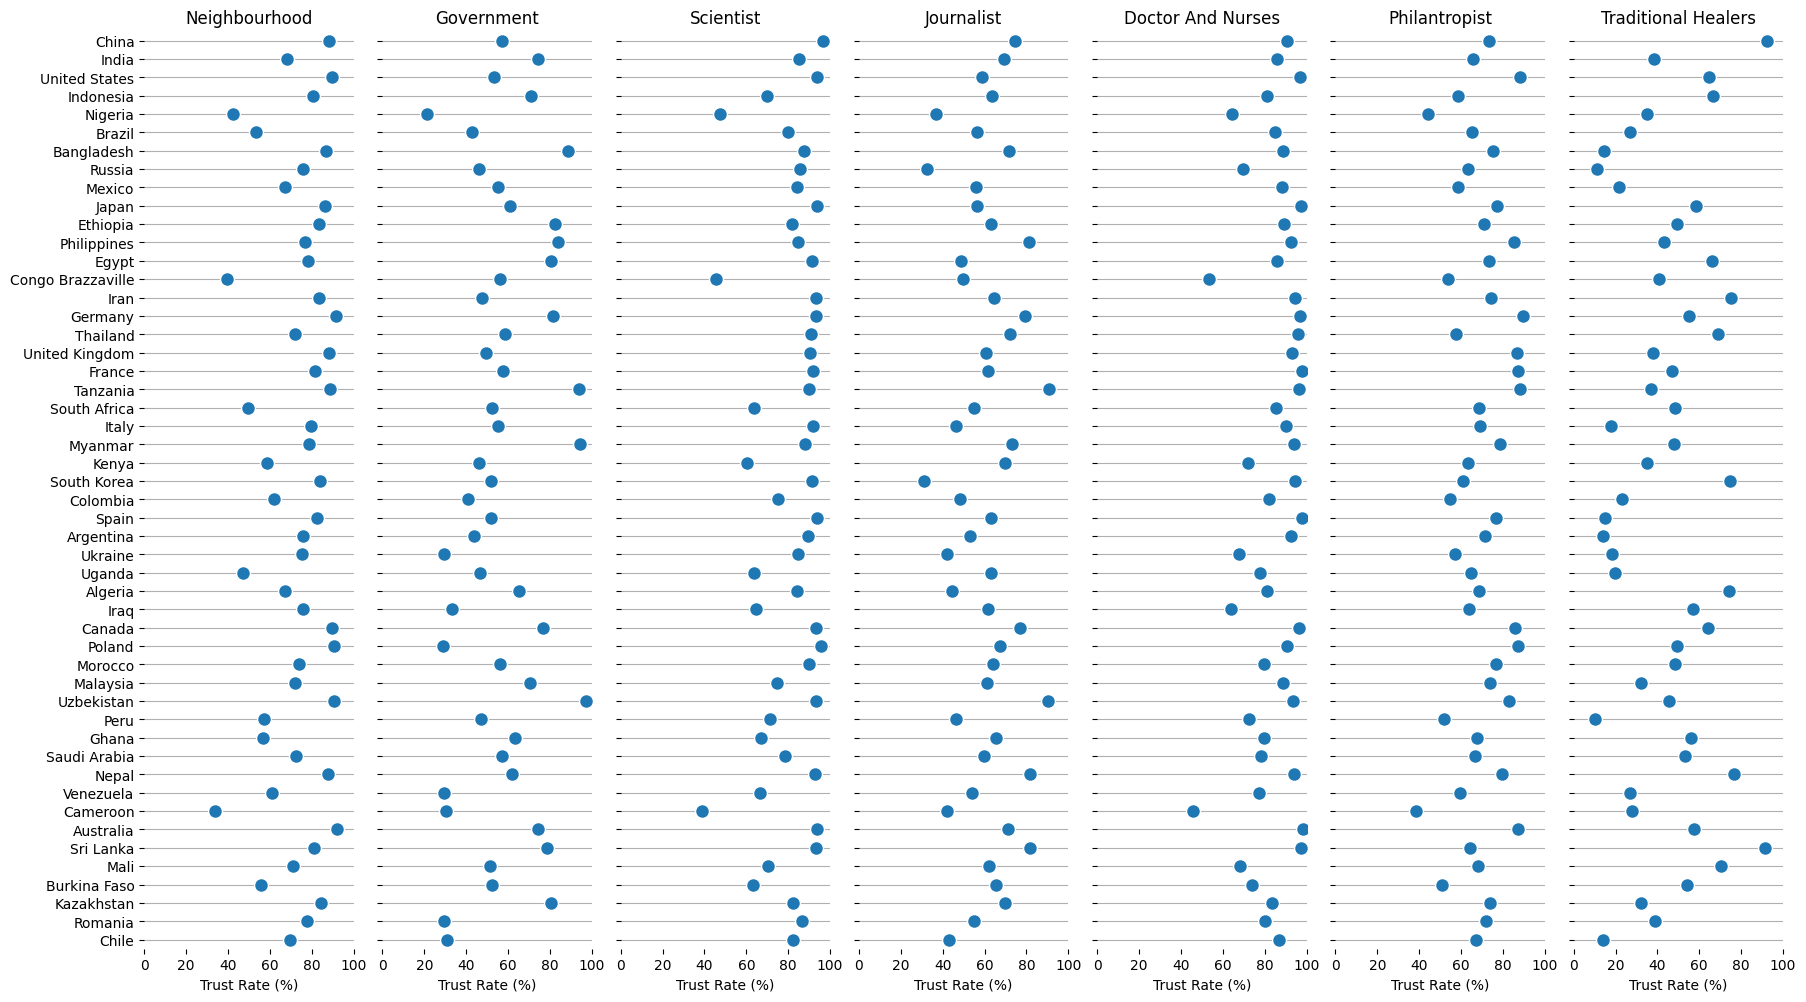

In [4]:
# Create PairGrid

g = sns.PairGrid(top_50_countries,
                 x_vars=trust_columns, y_vars=["country"],
                 height=10, aspect=.25)

# Draw a dot plot
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Set x-axis limits and labels
g.set(xlim=(0, 100), xlabel="Trust Rate (%)", ylabel="")

# Add titles dynamically
titles = [col.replace('_', ' ').title() for col in trust_columns]
for ax, title in zip(g.axes.flat, titles):
    ax.set(title=title)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

# Clean up the plot
sns.despine(left=True, bottom=True)
plt.show()

In [5]:
# finding bottom 50 countries plot

bottom_50_countries = data.nsmallest(50, "population")

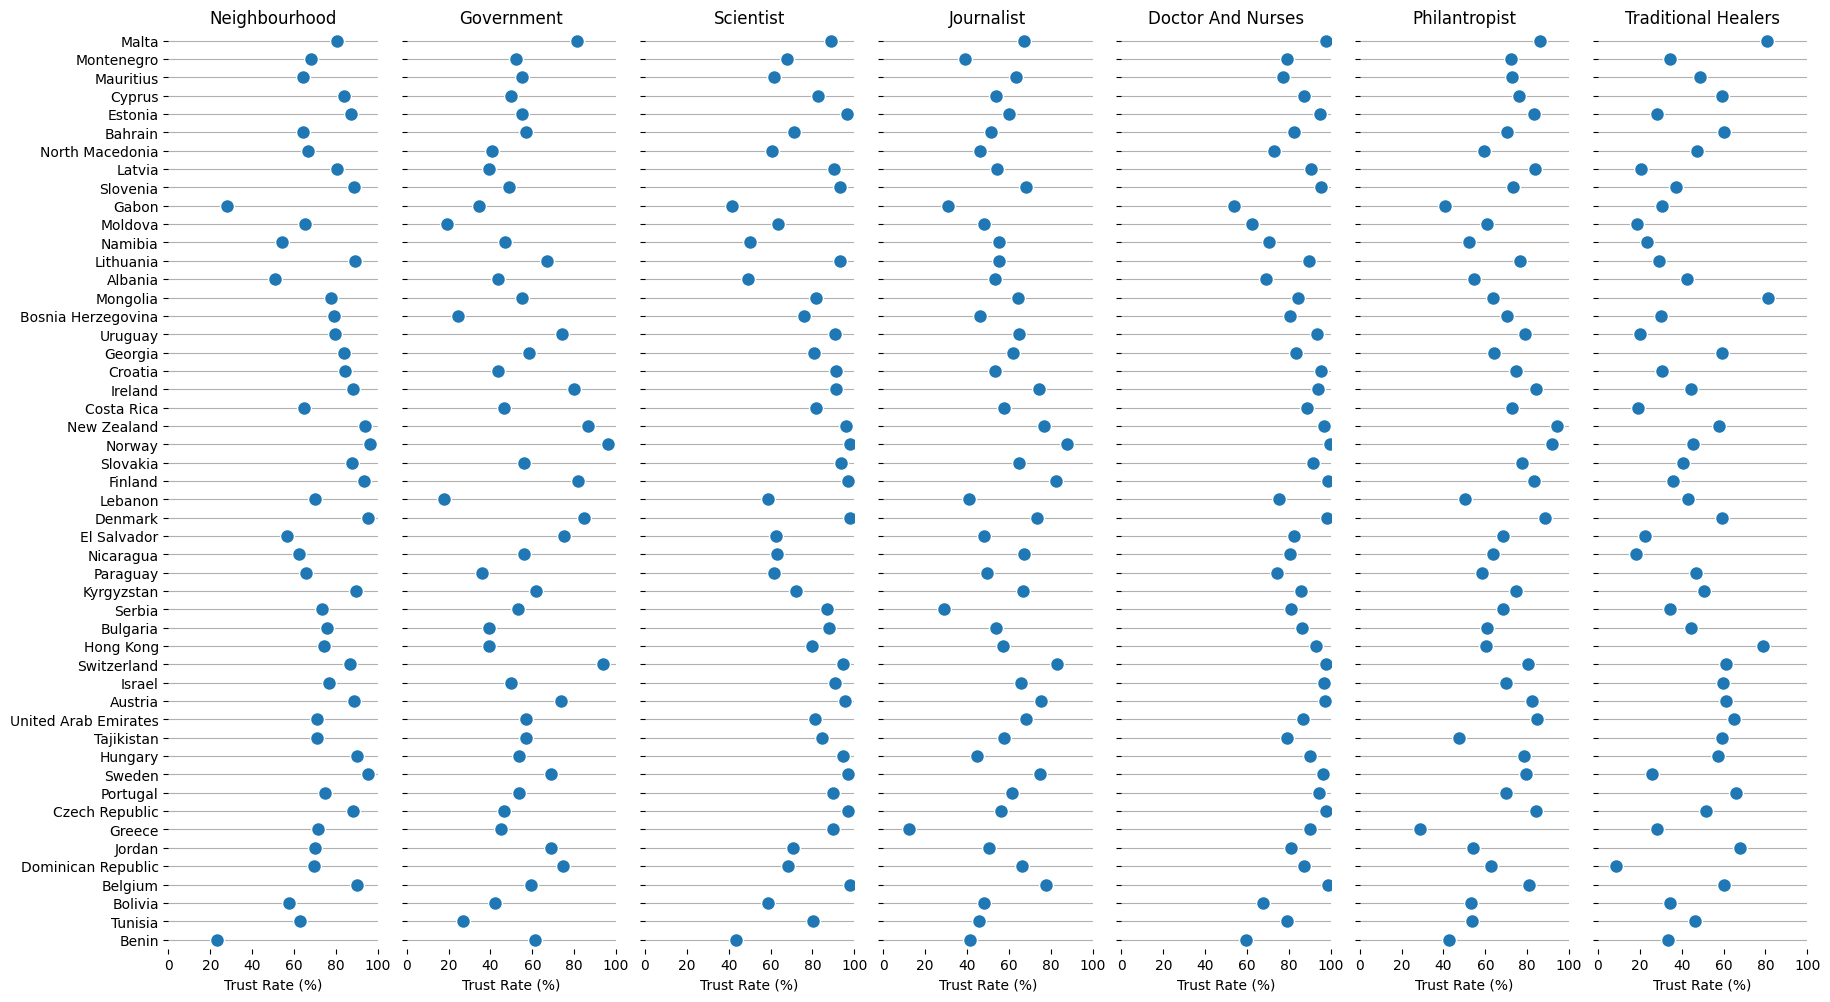

In [6]:

g = sns.PairGrid(bottom_50_countries,
                 x_vars=trust_columns, y_vars=["country"],
                 height=10, aspect=.25)


g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

g.set(xlim=(0, 100), xlabel="Trust Rate (%)", ylabel="")


titles = [col.replace('_', ' ').title() for col in trust_columns]
for ax, title in zip(g.axes.flat, titles):
    ax.set(title=title)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)


sns.despine(left=True, bottom=True)
plt.show()

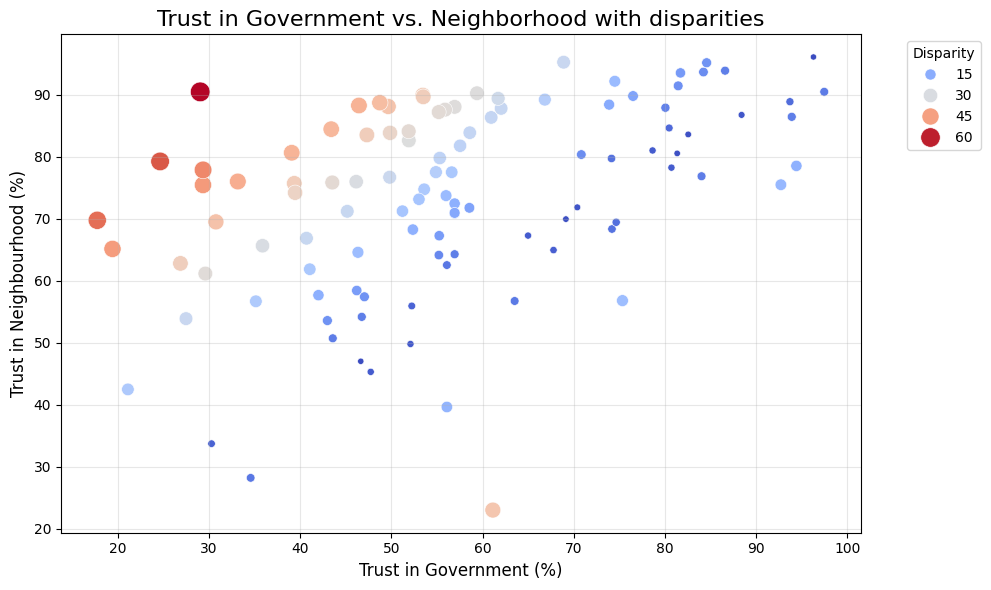

In [7]:
#attempting to calculate the disparity between governemnt and neighborhood trust
data['gov_neigh_disparity'] = abs(data['government'] - data['neighbourhood'])

#maybe a scatter plot?
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=data,
    x='government',
    y='neighbourhood',
    size='gov_neigh_disparity',
    hue='gov_neigh_disparity',
    palette='coolwarm',
    sizes=(20, 200),
    edgecolor='w'
)

#labels and titles
plt.title("Trust in Government vs. Neighborhood with disparities", fontsize=16)
plt.xlabel("Trust in Government (%)", fontsize=12)
plt.ylabel("Trust in Neighbourhood (%)", fontsize=12)
plt.legend(title="Disparity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)

# plotting
plt.tight_layout()
plt.show()

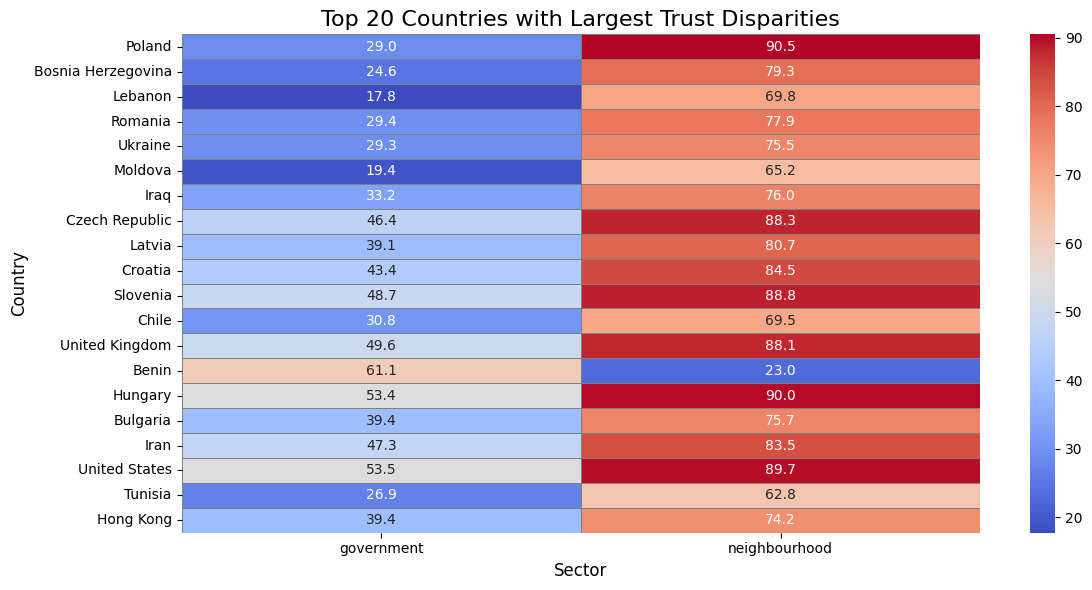

In [8]:
# trying a heatmap
top_disparities = data.nlargest(20, 'gov_neigh_disparity')


heatmap_data = top_disparities.set_index('country')[['government', 'neighbourhood']]

# plotting heatmap
plt.figure(figsize=(12, 6))  # Adjust dimensions
sns.heatmap(
    heatmap_data,
    annot=True,  
    fmt=".1f",  
    cmap="coolwarm",  
    linewidths=0.5,  
    linecolor="gray" 
)
plt.title("Top 20 Countries with Largest Trust Disparities", fontsize=16)
plt.xlabel("Sector", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.tight_layout()
plt.show()

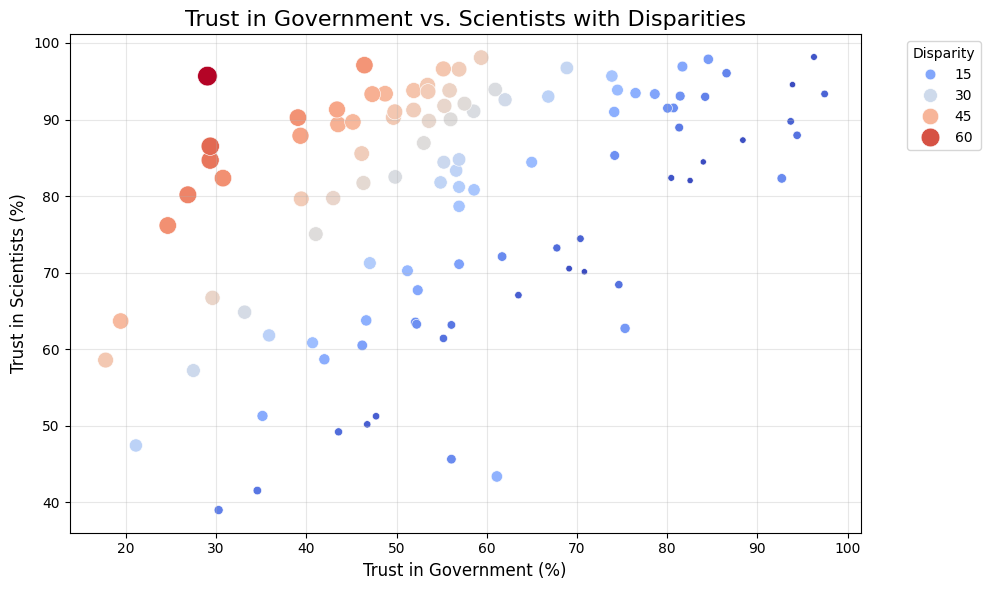

In [9]:
#trying the same with scientists

data['gov_sci_disparity'] = abs(data['government'] - data['scientist'])

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='government',
    y='scientist',
    size='gov_sci_disparity',
    hue='gov_sci_disparity',
    palette='coolwarm',
    sizes=(20, 200),
    edgecolor='w'
)

plt.title("Trust in Government vs. Scientists with Disparities", fontsize=16)
plt.xlabel("Trust in Government (%)", fontsize=12)
plt.ylabel("Trust in Scientists (%)", fontsize=12)
plt.legend(title="Disparity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

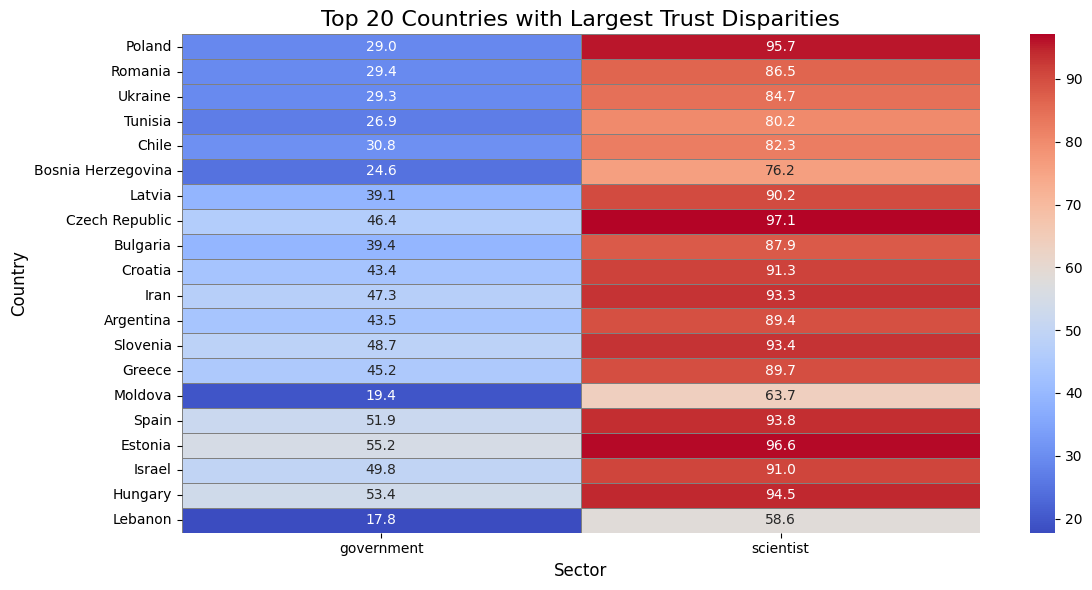

In [10]:
top_sci_disparities = data.nlargest(20, 'gov_sci_disparity')

heatmap_data = top_sci_disparities.set_index('country')[['government', 'scientist']]

plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data,
    annot=True, 
    fmt=".1f",  
    cmap="coolwarm", 
    linewidths=0.5, 
    linecolor="gray" 
)


plt.title("Top 20 Countries with Largest Trust Disparities", fontsize=16)
plt.xlabel("Sector", fontsize=12)
plt.ylabel("Country", fontsize=12)

plt.tight_layout()
plt.show()

In [11]:
#Trying another pair grid but this time sorted by trust in government

sorted_data = data.sort_values(by='government', ascending=False).head(50)

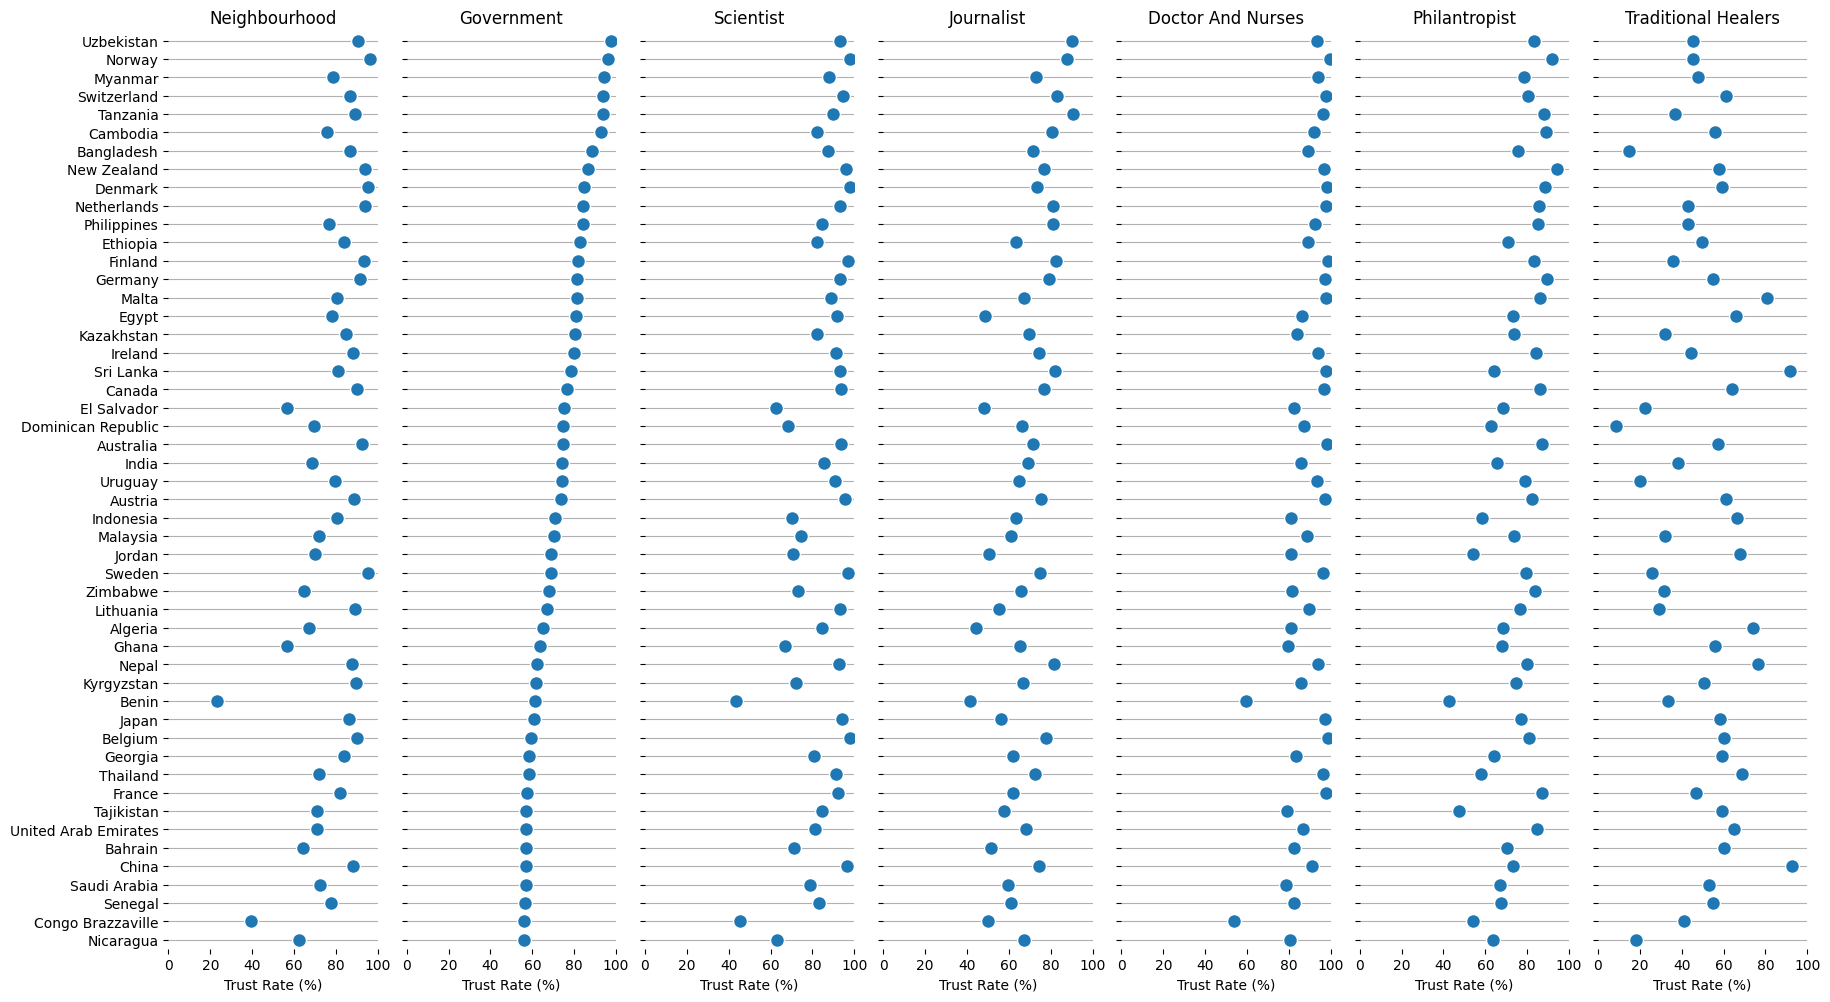

In [12]:
#making pair grid (again)
g = sns.PairGrid(sorted_data,
                 x_vars=trust_columns, y_vars=["country"],
                 height=10, aspect=.25)

g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

g.set(xlim=(0, 100), xlabel="Trust Rate (%)", ylabel="")

titles = [col.replace('_', ' ').title() for col in trust_columns]
for ax, title in zip(g.axes.flat, titles):
    ax.set(title=title)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

    sns.despine(left=True, bottom=True)
plt.show()

In [13]:
capitals_csv = "../Resources/country-capital-lat-long-population.csv"
capitals_data = pd.read_csv(capitals_csv)

print(capitals_data.head())
print(capitals_data.info())

          Country           Capital City  Latitude  Longitude  Population  \
0     Afghanistan                  Kabul   34.5289    69.1725     4011770   
1         Albania        Tiranë (Tirana)   41.3275    19.8189      475577   
2         Algeria  El Djazaïr  (Algiers)   36.7525     3.0420     2693542   
3  American Samoa              Pago Pago  -14.2781  -170.7025       48526   
4         Andorra       Andorra la Vella   42.5078     1.5211       22614   

  Capital Type  
0      Capital  
1      Capital  
2      Capital  
3      Capital  
4      Capital  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       234 non-null    object 
 1   Capital City  234 non-null    object 
 2   Latitude      234 non-null    float64
 3   Longitude     234 non-null    float64
 4   Population    234 non-null    int64  
 5   Capital Type  234 non-nul

In [14]:
capitals_data.columns = capitals_data.columns.str.strip()
capitals_data["Country"] = capitals_data["Country"].str.strip()

print("Missing values per column:")
print(capitals_data.isnull().sum())

capitals_data = capitals_data.dropna(subset=["Latitude", "Longitude"])

Missing values per column:
Country         0
Capital City    0
Latitude        0
Longitude       0
Population      0
Capital Type    0
dtype: int64


In [15]:
trust_data = pd.DataFrame(list(collection.find()))


if "_id" in trust_data.columns:
    trust_data = trust_data.drop(columns=["_id"])

print(trust_data.head())
print(trust_data.info())

     country  doctor_and_nurses  government  journalist  neighbourhood  \
0      China              90.86       56.93       74.62          88.08   
1      India              85.67       74.18       69.12          68.36   
2  Indonesia              81.09       70.82       63.41          80.38   
3    Nigeria              64.21       21.11       37.00          42.47   
4     Brazil              84.87       42.98       56.36          53.58   

   philantropist    population  scientist  traditional_healers Capital City_x  \
0          73.24  1.426106e+09      96.57                92.47        Beijing   
1          65.68  1.402618e+09      85.30                38.20          Delhi   
2          58.64  2.748149e+08      70.11                66.59        Jakarta   
3          44.08  2.139962e+08      47.41                35.11          Abuja   
4          65.22  2.086608e+08      79.73                26.95       Brasília   

   Latitude_x  Longitude_x  Population_x Capital City_y  Latitude_y 

In [26]:
print("Trust Data Countries:")
print(sorted(trust_data["country"].unique()))

print("\nCapitals Data Countries:")
print(sorted(capitals_data["Country"].unique()))

Trust Data Countries:
['Albania', 'Algeria', 'Argentina', 'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium', 'Benin', 'Bolivia', 'Bosnia Herzegovina', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'China', 'Colombia', 'Congo Brazzaville', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guinea', 'Hong Kong', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Lithuania', 'Malaysia', 'Mali', 'Malta', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Myanmar', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 'North Macedonia', 'Norway', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Saudi Arabia', 'S

In [27]:
print(capitals_data[capitals_data["Country"].str.contains("Kosovo", na=False)])

    Country Capital City  Latitude  Longitude  Population Capital Type  \
234  Kosovo          NaN   42.6629    21.1655     1790152          NaN   

      Capital  
234  Pristina  


In [28]:
# standardizing the names to be able to join
country_name_mapping = {
    "Bosnia and Herzegovina": "Bosnia Herzegovina",
    "Czechia": "Czech Republic",
    "Côte d'Ivoire": "Ivory Coast",
    "China, Hong Kong SAR": "Hong Kong",
    "Iran (Islamic Republic of)": "Iran",
    "Lao People's Democratic Republic": "Laos",
    "Republic of Moldova": "Moldova",
    "TFYR Macedonia": "North Macedonia",
    "Russian Federation": "Russia",
    "Republic of Korea": "South Korea",
    "Syrian Arab Republic": "Syria",
    "China, Taiwan Province of China": "Taiwan",
    "United Republic of Tanzania": "Tanzania",
    "United States of America": "United States",
    "Venezuela (Bolivarian Republic of)": "Venezuela",
    "Viet Nam": "Vietnam",
    "Bolivia (Plurinational State of)": "Bolivia",
    "Congo": "Congo Brazzaville"
    
}

capitals_data["Country"] = capitals_data["Country"].replace(country_name_mapping)

kosovo_data = {
    "Country": "Kosovo",
    "Capital": "Pristina",
    "Latitude": 42.6629,  # Approximate coordinates
    "Longitude": 21.1655,
    "Population": 1790152
}
capitals_data = pd.concat([capitals_data, pd.DataFrame([kosovo_data])], ignore_index=True)

In [29]:
# joining
merged_data = pd.merge(trust_data, capitals_data, left_on="country", right_on="Country", how="inner")

# removing redunancy
merged_data = merged_data.drop(columns=["Country"])

# Inspecting
print(merged_data.head())

     country  doctor_and_nurses  government  journalist  neighbourhood  \
0      China              90.86       56.93       74.62          88.08   
1      India              85.67       74.18       69.12          68.36   
2  Indonesia              81.09       70.82       63.41          80.38   
3    Nigeria              64.21       21.11       37.00          42.47   
4     Brazil              84.87       42.98       56.36          53.58   

   philantropist    population  scientist  traditional_healers Capital City_x  \
0          73.24  1.426106e+09      96.57                92.47        Beijing   
1          65.68  1.402618e+09      85.30                38.20          Delhi   
2          58.64  2.748149e+08      70.11                66.59        Jakarta   
3          44.08  2.139962e+08      47.41                35.11          Abuja   
4          65.22  2.086608e+08      79.73                26.95       Brasília   

   ...  Capital City_y  Latitude_y  Longitude_y Population_y  Capita

In [30]:
# seeing if any countries in trust_data not matched in capitals_data
unmatched_countries = trust_data[~trust_data["country"].isin(capitals_data["Country"])]

print("Unmatched countries after mapping:")
print(unmatched_countries["country"].unique())

Unmatched countries after mapping:
[]


In [43]:
# dropping redundant columns
columns_to_drop = ["Latitude_x"]
merged_data = merged_data.drop(columns=columns_to_drop)

# Verify the cleaned data
print(merged_data.head())

     country  doctor_and_nurses  government  journalist  neighbourhood  \
0      China              90.86       56.93       74.62          88.08   
1      India              85.67       74.18       69.12          68.36   
2  Indonesia              81.09       70.82       63.41          80.38   
3    Nigeria              64.21       21.11       37.00          42.47   
4     Brazil              84.87       42.98       56.36          53.58   

   philantropist    population  scientist  traditional_healers Capital City  \
0          73.24  1.426106e+09      96.57                92.47      Beijing   
1          65.68  1.402618e+09      85.30                38.20        Delhi   
2          58.64  2.748149e+08      70.11                66.59      Jakarta   
3          44.08  2.139962e+08      47.41                35.11        Abuja   
4          65.22  2.086608e+08      79.73                26.95     Brasília   

   Latitude  Longitude  Population  
0   39.9075   116.3972    19617963  
1   28

In [44]:
# Checked for duplicates
print(f"Number of duplicate rows: {merged_data.duplicated().sum()}")

print("Missing values per column:")
print(merged_data.isnull().sum())

merged_data = merged_data.dropna()

Number of duplicate rows: 0
Missing values per column:
country                0
doctor_and_nurses      0
government             0
journalist             0
neighbourhood          0
philantropist          0
population             0
scientist              0
traditional_healers    0
Capital City           0
Latitude               0
Longitude              0
Population             0
dtype: int64


In [45]:
# Convert the DataFrame to a list of dictionaries
data_dict = merged_data.to_dict(orient="records")

collection.drop()

collection.insert_many(data_dict)

InsertManyResult([ObjectId('67984c439c637be941f198c0'), ObjectId('67984c439c637be941f198c1'), ObjectId('67984c439c637be941f198c2'), ObjectId('67984c439c637be941f198c3'), ObjectId('67984c439c637be941f198c4'), ObjectId('67984c439c637be941f198c5'), ObjectId('67984c439c637be941f198c6'), ObjectId('67984c439c637be941f198c7'), ObjectId('67984c439c637be941f198c8'), ObjectId('67984c439c637be941f198c9'), ObjectId('67984c439c637be941f198ca'), ObjectId('67984c439c637be941f198cb'), ObjectId('67984c439c637be941f198cc'), ObjectId('67984c439c637be941f198cd'), ObjectId('67984c439c637be941f198ce'), ObjectId('67984c439c637be941f198cf'), ObjectId('67984c439c637be941f198d0'), ObjectId('67984c439c637be941f198d1'), ObjectId('67984c439c637be941f198d2'), ObjectId('67984c439c637be941f198d3'), ObjectId('67984c439c637be941f198d4'), ObjectId('67984c439c637be941f198d5'), ObjectId('67984c439c637be941f198d6'), ObjectId('67984c439c637be941f198d7'), ObjectId('67984c439c637be941f198d8'), ObjectId('67984c439c637be941f198

In [46]:
for record in collection.find().limit(5):
    print(record)

{'_id': ObjectId('67984c439c637be941f198c0'), 'country': 'China', 'doctor_and_nurses': 90.86, 'government': 56.93, 'journalist': 74.62, 'neighbourhood': 88.08, 'philantropist': 73.24, 'population': 1426106093.0, 'scientist': 96.57, 'traditional_healers': 92.47, 'Capital City': 'Beijing', 'Latitude': 39.9075, 'Longitude': 116.3972, 'Population': 19617963}
{'_id': ObjectId('67984c439c637be941f198c1'), 'country': 'India', 'doctor_and_nurses': 85.67, 'government': 74.18, 'journalist': 69.12, 'neighbourhood': 68.36, 'philantropist': 65.68, 'population': 1402617695.0, 'scientist': 85.3, 'traditional_healers': 38.2, 'Capital City': 'Delhi', 'Latitude': 28.6667, 'Longitude': 77.2167, 'Population': 28513682}
{'_id': ObjectId('67984c439c637be941f198c2'), 'country': 'Indonesia', 'doctor_and_nurses': 81.09, 'government': 70.82, 'journalist': 63.41, 'neighbourhood': 80.38, 'philantropist': 58.64, 'population': 274814866.0, 'scientist': 70.11, 'traditional_healers': 66.59, 'Capital City': 'Jakarta',

In [47]:
# Save the cleaned DataFrame to a CSV file
merged_data.to_csv("../Resources/cleaned_merged_data.csv", index=False)